## Step 1: EDA và xử lí dữ liệu thiếu
### 1. EDA

In [1]:
!pip install pandas numpy scikit-learn imbalanced-learn matplotlib seaborn
!pip install imbalanced-learn


In [6]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2


In [3]:
data_apache_path = "./data/Software Defect Prediction - Data/dataApache(PROMISE)"     
data_nasa_path = "./data/Software Defect Prediction - Data/dataNASA"             

In [7]:
def load_data(data_path):
    files = os.listdir(data_path)
    data = []
    for file in files:
        if file.endswith(".csv"): 
            data.append(pd.read_csv(os.path.join(data_path, file)))
    return data

data_apache = load_data(data_apache_path)
data_nasa = load_data(data_nasa_path)

In [8]:
def check_missing_data(data, dataset_name):
    for idx, df in enumerate(data):
        missing = df.isnull().sum().sum()
        print(f"Dữ liệu thiếu trong file {dataset_name} {idx + 1}: {missing}")

check_missing_data(data_apache_cleaned, "Apache")
check_missing_data(data_nasa_cleaned, "NASA")

NameError: name 'data_apache_cleaned' is not defined

In [9]:
print(f"Số file trong Apache (PROMISE): {len(data_apache)}")
print(f"Số file trong NASA: {len(data_nasa)}")

for idx, df in enumerate(data_apache):
    print(f"Apache File {idx + 1}: {df.shape}")

for idx, df in enumerate(data_nasa):
    print(f"NASA File {idx + 1}: {df.shape}")

Số file trong Apache (PROMISE): 44
Số file trong NASA: 10
Apache File 1: (293, 22)
Apache File 2: (157, 22)
Apache File 3: (225, 21)
Apache File 4: (222, 22)
Apache File 5: (178, 22)
Apache File 6: (351, 22)
Apache File 7: (340, 22)
Apache File 8: (256, 22)
Apache File 9: (745, 22)
Apache File 10: (125, 22)
Apache File 11: (195, 22)
Apache File 12: (247, 22)
Apache File 13: (723, 22)
Apache File 14: (111, 22)
Apache File 15: (339, 22)
Apache File 16: (162, 22)
Apache File 17: (175, 21)
Apache File 18: (241, 22)
Apache File 19: (803, 22)
Apache File 20: (909, 22)
Apache File 21: (440, 22)
Apache File 22: (453, 22)
Apache File 23: (608, 22)
Apache File 24: (352, 22)
Apache File 25: (885, 22)
Apache File 26: (229, 22)
Apache File 27: (588, 22)
Apache File 28: (965, 22)
Apache File 29: (214, 22)
Apache File 30: (872, 22)
Apache File 31: (196, 22)
Apache File 32: (237, 22)
Apache File 33: (644, 21)
Apache File 34: (492, 22)
Apache File 35: (442, 22)
Apache File 36: (367, 22)
Apache File 37:

In [10]:
for idx, df in enumerate(data_apache[:1]):  
    print(f"Apache File {idx + 1} Columns: {df.columns}")

for idx, df in enumerate(data_nasa[:1]): 
    print(f"NASA File {idx + 1} Columns: {df.columns}")


Apache File 1 Columns: Index(['name', 'wmc', 'dit', 'noc', 'cbo', 'rfc', 'lcom', 'ca', 'ce', 'npm',
       'lcom3', 'loc', 'dam', 'moa', 'mfa', 'cam', 'ic', 'cbm', 'amc',
       'max_cc', 'avg_cc', 'bug'],
      dtype='object')
NASA File 1 Columns: Index(['id', 'LOC_BLANK', 'BRANCH_COUNT', 'CALL_PAIRS', 'LOC_CODE_AND_COMMENT',
       'LOC_COMMENTS', 'CONDITION_COUNT', 'CYCLOMATIC_COMPLEXITY',
       'CYCLOMATIC_DENSITY', 'DECISION_COUNT', 'DESIGN_COMPLEXITY',
       'DESIGN_DENSITY', 'EDGE_COUNT', 'ESSENTIAL_COMPLEXITY',
       'ESSENTIAL_DENSITY', 'LOC_EXECUTABLE', 'PARAMETER_COUNT',
       'GLOBAL_DATA_COMPLEXITY', 'GLOBAL_DATA_DENSITY', 'HALSTEAD_CONTENT',
       'HALSTEAD_DIFFICULTY', 'HALSTEAD_EFFORT', 'HALSTEAD_ERROR_EST',
       'HALSTEAD_LENGTH', 'HALSTEAD_LEVEL', 'HALSTEAD_PROG_TIME',
       'HALSTEAD_VOLUME', 'MAINTENANCE_SEVERITY', 'MODIFIED_CONDITION_COUNT',
       'MULTIPLE_CONDITION_COUNT', 'NODE_COUNT',
       'NORMALIZED_CYLOMATIC_COMPLEXITY', 'NUM_OPERANDS', 'NUM_OPERA

In [293]:
# Gộp tất cả các file thành một DataFrame lớn
#all_data_apache = pd.concat(data_apache, ignore_index=True)
#all_data_nasa = pd.concat(data_nasa, ignore_index=True)

# Kiểm tra dữ liệu thiếu cho Apache
#print("Dữ liệu thiếu trong Apache (PROMISE):")
#print(missing_values_apache[missing_values_apache > 0])  # Chỉ hiển thị cột có NaN

# Kiểm tra dữ liệu thiếu cho NASA
#missing_values_nasa = all_data_nasa.isnull().sum()
#print("Dữ liệu thiếu trong NASA:")
#print(missing_values_nasa[missing_values_nasa > 0])  # Chỉ hiển thị cột có NaN


### 2. Xử lí dữ liệu thiếu

In [11]:
import numpy as np
from sklearn.impute import KNNImputer

# Hàm xử lý dữ liệu thiếu cho từng file
def handle_missing_data_knn(data):
    imputer = KNNImputer(n_neighbors=5)
    
    for idx, df in enumerate(data):
        numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
        categorical_columns = df.select_dtypes(include=['object']).columns

        # Chỉ áp dụng KNN cho cột số liệu
        if not numerical_columns.empty:
            df[numerical_columns] = imputer.fit_transform(df[numerical_columns])

        # Điền giá trị thiếu cho cột phân loại bằng mode()
        for col in categorical_columns:
            df[col].fillna(df[col].mode()[0], inplace=True)

    return data

data_apache_cleaned = handle_missing_data_knn(data_apache)
data_nasa_cleaned = handle_missing_data_knn(data_nasa)


/var/folders/r7/n7nr1fpd5cq1227nr94w5tm40000gn/T/ipykernel_30336/780070762.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
/var/folders/r7/n7nr1fpd5cq1227nr94w5tm40000gn/T/ipykernel_30336/780070762.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alway

In [12]:
# Lưu dữ liệu đã xử lý
processed_apache_path = "./processed_data/apache/"
processed_nasa_path = "./processed_data/nasa/"

os.makedirs(processed_apache_path, exist_ok=True)
os.makedirs(processed_nasa_path, exist_ok=True)

for idx, df in enumerate(data_apache_cleaned):
    df.to_csv(f"{processed_apache_path}/apache_{idx + 1}.csv", index=False)

for idx, df in enumerate(data_nasa_cleaned):
    df.to_csv(f"{processed_nasa_path}/nasa_{idx + 1}.csv", index=False)

print("Đã lưu dữ liệu sau khi xử lý.")


Đã lưu dữ liệu sau khi xử lý.


### 3. Chuẩn hoá và xử lí nhãn

In [13]:
from sklearn.preprocessing import MinMaxScaler

# Chuyển đổi nhãn về 0 và 1
def transform_labels(data, label_col, dataset_name):
    for idx, df in enumerate(data):
        if dataset_name == "NASA":
            if label_col in df.columns:
                df[label_col] = df[label_col].map({'Y': 1, 'N': 0})
        elif dataset_name == "Apache":
            if label_col in df.columns:
                df[label_col] = df[label_col].apply(lambda x: 1 if x > 0 else 0)
    return data

# Chuẩn hóa dữ liệu (bỏ qua cột nhãn)
def normalize_data(data, label_col):
    scaler = MinMaxScaler()
    for idx, df in enumerate(data):
        # Tách cột nhãn
        labels = df[label_col]
        
        # Chuẩn hóa các cột số liệu
        numerical_columns = df.drop(columns=[label_col]).select_dtypes(include=['float64', 'int64']).columns
        df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
        
        # Gắn lại cột nhãn
        df[label_col] = labels
    return data



In [14]:
# Áp dụng chuyển đổi nhãn
data_nasa_cleaned = transform_labels(data_nasa_cleaned, label_col='Defective', dataset_name="NASA")
data_apache_cleaned = transform_labels(data_apache_cleaned, label_col='bug', dataset_name="Apache")

# Áp dụng chuẩn hóa
data_nasa_cleaned = normalize_data(data_nasa_cleaned, label_col='Defective')
data_apache_cleaned = normalize_data(data_apache_cleaned, label_col='bug')

# Kiểm tra lại kết quả
def check_label_distribution(data, label_col, dataset_name):
    for idx, df in enumerate(data):
        label_counts = df[label_col].value_counts()
        print(f"Phân phối nhãn trong file {dataset_name} {idx + 1}:")
        print(label_counts)

check_label_distribution(data_nasa_cleaned, label_col='Defective', dataset_name="NASA")
check_label_distribution(data_apache_cleaned, label_col='bug', dataset_name="Apache")


Phân phối nhãn trong file NASA 1:
Defective
0    1236
1     458
Name: count, dtype: int64
Phân phối nhãn trong file NASA 2:
Defective
0    80
1    44
Name: count, dtype: int64
Phân phối nhãn trong file NASA 3:
Defective
0    1094
1     176
Name: count, dtype: int64
Phân phối nhãn trong file NASA 4:
Defective
0    1916
1      36
Name: count, dtype: int64
Phân phối nhãn trong file NASA 5:
Defective
0    158
1     36
Name: count, dtype: int64
Phân phối nhãn trong file NASA 6:
Defective
0    923
1    130
Name: count, dtype: int64
Phân phối nhãn trong file NASA 7:
Defective
0    285
1     42
Name: count, dtype: int64
Phân phối nhãn trong file NASA 8:
Defective
0    225
1     25
Name: count, dtype: int64
Phân phối nhãn trong file NASA 9:
Defective
0    624
1     55
Name: count, dtype: int64
Phân phối nhãn trong file NASA 10:
Defective
0    868
1    294
Name: count, dtype: int64
Phân phối nhãn trong file Apache 1:
bug
0    261
1     32
Name: count, dtype: int64
Phân phối nhãn trong file Apach

In [15]:
import os
import glob

# Lưu các file đã chuyển hoá vào thư mục data_cleaned với tên gốc
def save_cleaned_data(data, file_paths, output_dir):
    # Tạo thư mục data_cleaned nếu chưa có
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    # Lưu từng DataFrame vào thư mục với tên gốc
    for idx, df in enumerate(data):
        file_path = file_paths[idx]  # Lấy đường dẫn gốc của file
        file_name = file_path.split('/')[-1]  # Lấy tên file từ đường dẫn
        new_file_path = os.path.join(output_dir, file_name)  # Tạo đường dẫn mới trong thư mục data_cleaned
        df.to_csv(new_file_path, index=False)  # Lưu DataFrame vào file CSV
        print(f"Saved cleaned data to {new_file_path}")

# Đọc lại danh sách file gốc để lưu tên không thay đổi
file_paths_nasa = glob.glob('./data/Software Defect Prediction - Data/dataNASA/*.csv')  # Cập nhật đường dẫn gốc cho dữ liệu NASA
file_paths_apache = glob.glob('./data/Software Defect Prediction - Data/dataApache(PROMISE)/*.csv')  # Cập nhật đường dẫn gốc cho dữ liệu Apache

# Lưu các file đã chuyển hoá và chuẩn hóa vào thư mục data_cleaned
output_dir = './data_cleaned'
save_cleaned_data(data_apache_cleaned, file_paths_apache, output_dir)


Saved cleaned data to ./data_cleaned/ant-1.5.csv
Saved cleaned data to ./data_cleaned/synapse-1.0.csv
Saved cleaned data to ./data_cleaned/arc.csv
Saved cleaned data to ./data_cleaned/synapse-1.1.csv
Saved cleaned data to ./data_cleaned/ant-1.4.csv
Saved cleaned data to ./data_cleaned/ant-1.6.csv
Saved cleaned data to ./data_cleaned/lucene-2.4.csv
Saved cleaned data to ./data_cleaned/synapse-1.2.csv
Saved cleaned data to ./data_cleaned/ant-1.7.csv
Saved cleaned data to ./data_cleaned/ant-1.3.csv
Saved cleaned data to ./data_cleaned/lucene-2.0.csv
Saved cleaned data to ./data_cleaned/lucene-2.2.csv
Saved cleaned data to ./data_cleaned/xalan-2.4.csv
Saved cleaned data to ./data_cleaned/ivy-1.0.csv
Saved cleaned data to ./data_cleaned/camel-1.0.csv
Saved cleaned data to ./data_cleaned/xerces-1.1.csv
Saved cleaned data to ./data_cleaned/redaktor.csv
Saved cleaned data to ./data_cleaned/ivy-1.1.csv
Saved cleaned data to ./data_cleaned/xalan-2.5.csv
Saved cleaned data to ./data_cleaned/xalan

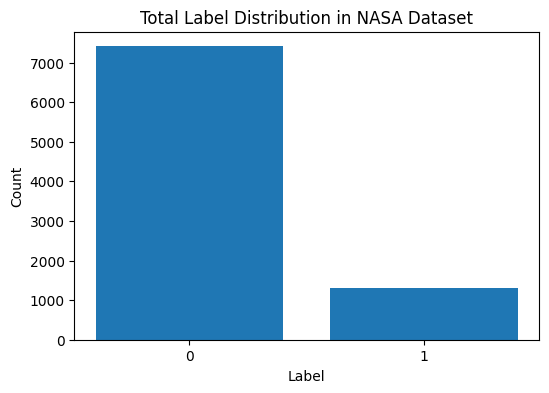

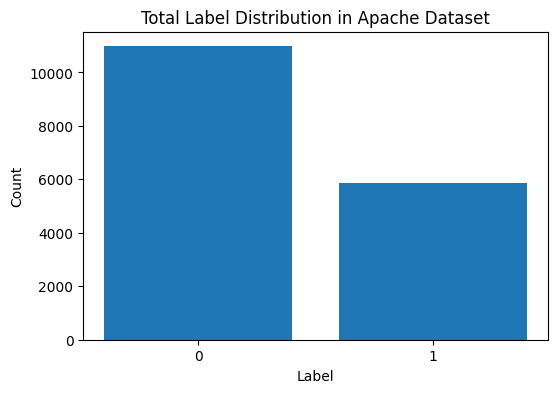

In [16]:
import matplotlib.pyplot as plt

# Tổng hợp và vẽ biểu đồ phân phối nhãn cho từng bộ dữ liệu
def plot_label_distribution(data, label_col, dataset_name):
    total_counts = {0: 0, 1: 0}
    
    for idx, df in enumerate(data):
        label_counts = df[label_col].value_counts().to_dict()
        total_counts[0] += label_counts.get(0, 0)
        total_counts[1] += label_counts.get(1, 0)
    
    # Vẽ biểu đồ
    labels = ['0', '1']
    values = [total_counts[0], total_counts[1]]
    
    plt.figure(figsize=(6, 4))
    plt.bar(labels, values)
    plt.title(f"Total Label Distribution in {dataset_name} Dataset")
    plt.xlabel("Label")
    plt.ylabel("Count")
    plt.show()

# Vẽ biểu đồ cho cả hai bộ dữ liệu
plot_label_distribution(data_nasa_cleaned, label_col='Defective', dataset_name="NASA")
plot_label_distribution(data_apache_cleaned, label_col='bug', dataset_name="Apache")


## Bước 2: Xử lí từng tập dữ liệu riêng biệt

## 1. Thực hiện xử lí bộ dữ liệu NASA
- Sử dụng cách chia k-fold để training cho toàn bộ tập dữ liệu
- SMOTE cho bộ dữ liệu nhằm đảm bảo cân bằng bộ dữ liệu
- PCA để giảm chiều dữ liệu trước khi training
- Feature selection để chọn ra các đặc trưng có quyết định lớn nhất tới kết của training

### Xử lí bộ dữ liệu NASA

- Thực hiện lựa chọn đặc trưng bằng Chi2.
- Giảm chiều bằng PCA.
- Dùng các mô hình tổng hợp RF, DT, Logistic Regression, và SVM.
- Tích hợp SMOTE để xử lý dữ liệu mất cân bằng.

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import make_scorer
from imblearn.metrics import geometric_mean_score
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, chi2

# Feature selection and PCA integration
def preprocess_data(data, label_col):
    X = data.drop(columns=[label_col])
    y = data[label_col]

    # Feature Selection using Chi2
    selector = SelectKBest(score_func=chi2, k=min(10, X.shape[1]))
    X_selected = selector.fit_transform(X, y)

    # Dimensionality Reduction using PCA
    pca = PCA(n_components=min(10, X_selected.shape[1]))
    X_pca = pca.fit_transform(X_selected)

    return X_pca, y

def train_and_evaluate_model(X, y):
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y)

    models = [
        ('rf', RandomForestClassifier(random_state=42)),
        ('dt', DecisionTreeClassifier(random_state=42)),
        ('lr', LogisticRegression(random_state=42)),
        ('svm', SVC(probability=True, random_state=42))
    ]

    ensemble_model = VotingClassifier(estimators=models, voting='soft')

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    metrics = {
        "accuracy": np.mean(cross_val_score(ensemble_model, X_resampled, y_resampled, cv=cv, scoring='accuracy')),
        "f1_score": np.mean(cross_val_score(ensemble_model, X_resampled, y_resampled, cv=cv, scoring='f1')),
        "roc_auc": np.mean(cross_val_score(ensemble_model, X_resampled, y_resampled, cv=cv, scoring='roc_auc')),
        "geometric_mean": np.mean(cross_val_score(ensemble_model, X_resampled, y_resampled, cv=cv, scoring=make_scorer(geometric_mean_score)))
    }

    return metrics

def export_results_to_excel(results, filename):
    df = pd.DataFrame(results)
    df.to_excel(filename, index=False)
    print(f"Results exported to {filename}")

def main(dataframes, label_col="Defective", output_filename="results.xlsx"):
    results = []

    for idx, data in enumerate(dataframes):
        print(f"Processing dataset {idx + 1}")

        X, y = preprocess_data(data, label_col)
        metrics = train_and_evaluate_model(X, y)

        results.append({
            "Dataset": f"Dataset {idx + 1}",
            "Accuracy": metrics["accuracy"],
            "F1 Score": metrics["f1_score"],
            "ROC AUC": metrics["roc_auc"],
            "Geometric Mean": metrics["geometric_mean"]
        })

    export_results_to_excel(results, output_filename)

# Example usage with NASA datasets
main(data_nasa_cleaned, label_col="Defective", output_filename="nasa_full.xlsx")


Processing dataset 1
Processing dataset 2
Processing dataset 3
Processing dataset 4
Processing dataset 5
Processing dataset 6
Processing dataset 7
Processing dataset 8
Processing dataset 9
Processing dataset 10
Results exported to nasa_full.xlsx


In [281]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import make_scorer
from imblearn.metrics import geometric_mean_score
from imblearn.over_sampling import SMOTE

# PCA integration without Feature Selection
def preprocess_data(data, label_col):
    X = data.drop(columns=[label_col])
    y = data[label_col]

    # Dimensionality Reduction using PCA
    pca = PCA(n_components=min(10, X.shape[1]))
    X_pca = pca.fit_transform(X)

    return X_pca, y

def train_and_evaluate_model(X, y):
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y)

    models = [
        ('rf', RandomForestClassifier(random_state=42)),
        ('dt', DecisionTreeClassifier(random_state=42)),
        ('lr', LogisticRegression(random_state=42)),
        ('svm', SVC(probability=True, random_state=42))
    ]

    ensemble_model = VotingClassifier(estimators=models, voting='soft')

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    metrics = {
        "accuracy": np.mean(cross_val_score(ensemble_model, X_resampled, y_resampled, cv=cv, scoring='accuracy')),
        "f1_score": np.mean(cross_val_score(ensemble_model, X_resampled, y_resampled, cv=cv, scoring='f1')),
        "roc_auc": np.mean(cross_val_score(ensemble_model, X_resampled, y_resampled, cv=cv, scoring='roc_auc')),
        "geometric_mean": np.mean(cross_val_score(ensemble_model, X_resampled, y_resampled, cv=cv, scoring=make_scorer(geometric_mean_score)))
    }

    return metrics

def export_results_to_excel(results, filename):
    df = pd.DataFrame(results)
    df.to_excel(filename, index=False)
    print(f"Results exported to {filename}")

def main(dataframes, label_col="Defective", output_filename="results.xlsx"):
    results = []

    for idx, data in enumerate(dataframes):
        print(f"Processing dataset {idx + 1}")

        X, y = preprocess_data(data, label_col)
        metrics = train_and_evaluate_model(X, y)

        results.append({
            "Dataset": f"Dataset {idx + 1}",
            "Accuracy": metrics["accuracy"],
            "F1 Score": metrics["f1_score"],
            "ROC AUC": metrics["roc_auc"],
            "Geometric Mean": metrics["geometric_mean"]
        })

    export_results_to_excel(results, output_filename)

# Example usage with NASA datasets
main(data_nasa_cleaned, label_col="Defective", output_filename="nasa_-Chi2.xlsx")


Processing dataset 1
Processing dataset 2
Processing dataset 3
Processing dataset 4
Processing dataset 5
Processing dataset 6
Processing dataset 7
Processing dataset 8
Processing dataset 9
Processing dataset 10
Results exported to nasa_-Chi2.xlsx


In [282]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import make_scorer
from imblearn.metrics import geometric_mean_score
from sklearn.feature_selection import SelectKBest, chi2

# Feature Selection using Chi2 and PCA integration
def preprocess_data(data, label_col):
    X = data.drop(columns=[label_col])
    y = data[label_col]

    # Feature Selection using Chi2
    selector = SelectKBest(score_func=chi2, k=min(10, X.shape[1]))
    X_selected = selector.fit_transform(X, y)

    # Dimensionality Reduction using PCA
    pca = PCA(n_components=min(10, X_selected.shape[1]))
    X_pca = pca.fit_transform(X_selected)

    return X_pca, y

def train_and_evaluate_model(X, y):
    models = [
        ('rf', RandomForestClassifier(random_state=42)),
        ('dt', DecisionTreeClassifier(random_state=42)),
        ('lr', LogisticRegression(random_state=42)),
        ('svm', SVC(probability=True, random_state=42))
    ]

    ensemble_model = VotingClassifier(estimators=models, voting='soft')

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    metrics = {
        "accuracy": np.mean(cross_val_score(ensemble_model, X, y, cv=cv, scoring='accuracy')),
        "f1_score": np.mean(cross_val_score(ensemble_model, X, y, cv=cv, scoring='f1')),
        "roc_auc": np.mean(cross_val_score(ensemble_model, X, y, cv=cv, scoring='roc_auc')),
        "geometric_mean": np.mean(cross_val_score(ensemble_model, X, y, cv=cv, scoring=make_scorer(geometric_mean_score)))
    }

    return metrics

def export_results_to_excel(results, filename):
    df = pd.DataFrame(results)
    df.to_excel(filename, index=False)
    print(f"Results exported to {filename}")

def main(dataframes, label_col="Defective", output_filename="results.xlsx"):
    results = []

    for idx, data in enumerate(dataframes):
        print(f"Processing dataset {idx + 1}")

        X, y = preprocess_data(data, label_col)
        metrics = train_and_evaluate_model(X, y)

        results.append({
            "Dataset": f"Dataset {idx + 1}",
            "Accuracy": metrics["accuracy"],
            "F1 Score": metrics["f1_score"],
            "ROC AUC": metrics["roc_auc"],
            "Geometric Mean": metrics["geometric_mean"]
        })

    export_results_to_excel(results, output_filename)

main(data_nasa_cleaned, label_col="Defective", output_filename="nasa_-SMOTE.xlsx")


Processing dataset 1
Processing dataset 2
Processing dataset 3
Processing dataset 4
Processing dataset 5
Processing dataset 6
Processing dataset 7
Processing dataset 8
Processing dataset 9
Processing dataset 10
Results exported to nasa_-SMOTE.xlsx


In [283]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import make_scorer
from imblearn.metrics import geometric_mean_score
from sklearn.feature_selection import SelectKBest, chi2
from imblearn.over_sampling import SMOTE

# Feature Selection using Chi2

def preprocess_data(data, label_col):
    X = data.drop(columns=[label_col])
    y = data[label_col]

    # Feature Selection using Chi2
    selector = SelectKBest(score_func=chi2, k=min(10, X.shape[1]))
    X_selected = selector.fit_transform(X, y)

    return X_selected, y

def train_and_evaluate_model(X, y):
    # Apply SMOTE
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y)

    models = [
        ('rf', RandomForestClassifier(random_state=42)),
        ('dt', DecisionTreeClassifier(random_state=42)),
        ('lr', LogisticRegression(random_state=42)),
        ('svm', SVC(probability=True, random_state=42))
    ]

    ensemble_model = VotingClassifier(estimators=models, voting='soft')

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    metrics = {
        "accuracy": np.mean(cross_val_score(ensemble_model, X_resampled, y_resampled, cv=cv, scoring='accuracy')),
        "f1_score": np.mean(cross_val_score(ensemble_model, X_resampled, y_resampled, cv=cv, scoring='f1')),
        "roc_auc": np.mean(cross_val_score(ensemble_model, X_resampled, y_resampled, cv=cv, scoring='roc_auc')),
        "geometric_mean": np.mean(cross_val_score(ensemble_model, X_resampled, y_resampled, cv=cv, scoring=make_scorer(geometric_mean_score)))
    }

    return metrics

def export_results_to_excel(results, filename):
    df = pd.DataFrame(results)
    df.to_excel(filename, index=False)
    print(f"Results exported to {filename}")

def main(dataframes, label_col="Defective", output_filename="results.xlsx"):
    results = []

    for idx, data in enumerate(dataframes):
        print(f"Processing dataset {idx + 1}")

        X, y = preprocess_data(data, label_col)
        metrics = train_and_evaluate_model(X, y)

        results.append({
            "Dataset": f"Dataset {idx + 1}",
            "Accuracy": metrics["accuracy"],
            "F1 Score": metrics["f1_score"],
            "ROC AUC": metrics["roc_auc"],
            "Geometric Mean": metrics["geometric_mean"]
        })

    export_results_to_excel(results, output_filename)

# Example usage with NASA datasets
main(data_nasa_cleaned, label_col="Defective", output_filename="nasa_-PCA.xlsx")


Processing dataset 1
Processing dataset 2
Processing dataset 3
Processing dataset 4
Processing dataset 5
Processing dataset 6
Processing dataset 7
Processing dataset 8
Processing dataset 9
Processing dataset 10
Results exported to nasa_-PCA.xlsx


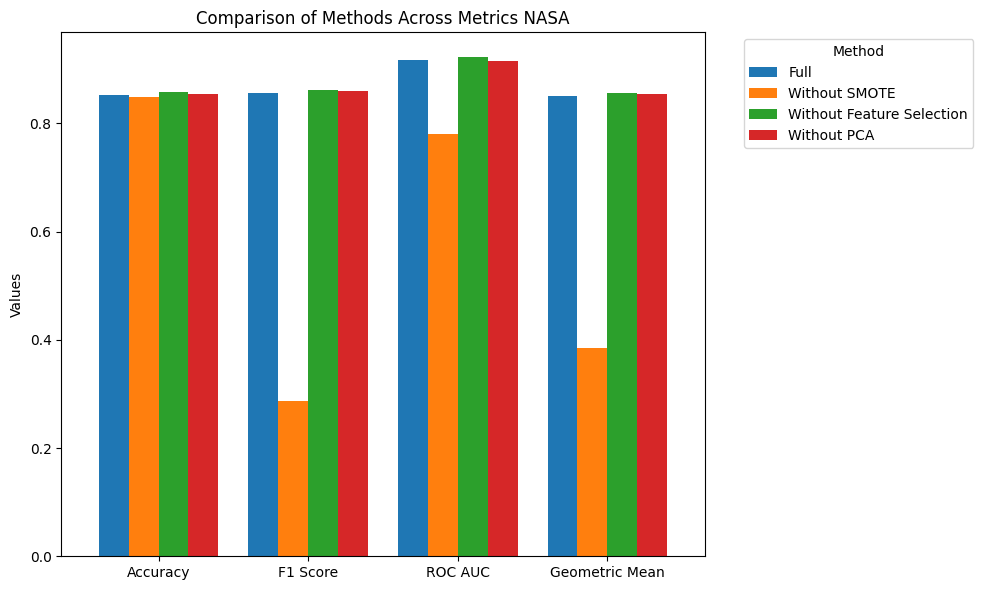

In [295]:
import matplotlib.pyplot as plt

# Data
categories = ['Accuracy', 'F1 Score', 'ROC AUC', 'Geometric Mean']
methods = ['Full', 'Without SMOTE', 'Without Feature Selection', 'Without PCA']

values = {
    'Full': [0.852704687, 0.856757468, 0.916945313, 0.850903337],
    'Without SMOTE': [0.848065705, 0.286410096, 0.780807863, 0.384540867],
    'Without Feature Selection': [0.858087, 0.862311, 0.921916, 0.856515],
    'Without PCA': [0.8545823, 0.858717, 0.9149826, 0.8535941]
}

# Convert to a DataFrame for easier plotting
df = pd.DataFrame(values, index=categories)

# Plot
df.plot(kind='bar', figsize=(10, 6), width=0.8)
plt.title('Comparison of Methods Across Metrics NASA')
plt.ylabel('Values')
plt.xticks(rotation=0)
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()


## 2. Thực hiện xử lí bộ dữ liệu PROMISE
- Sử dụng cách chia k-fold để training cho dữ liệu k có version, còn nếu có thì dùng tập cùng version training cho nhau.
- SMOTE cho bộ dữ liệu nhằm đảm bảo cân bằng bộ dữ liệu
- PCA để giảm chiều dữ liệu trước khi training
- Feature selection để chọn ra các đặc trưng có quyết định lớn nhất tới kết của training

In [20]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from imblearn.metrics import geometric_mean_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, make_scorer
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2
import numpy as np
import glob

# Preprocessing function with optional PCA
def preprocess_data(data, label_col, use_pca=False, n_components=5):
    non_numeric_cols = data.select_dtypes(include=['object']).columns
    if label_col in non_numeric_cols:
        non_numeric_cols = non_numeric_cols.drop(label_col)
    data = data.drop(columns=non_numeric_cols, errors='ignore')

    X = data.drop(columns=[label_col])
    y = data[label_col]

    # Feature Selection using Chi2
    selector = SelectKBest(score_func=chi2, k=min(10, X.shape[1]))
    X_selected = selector.fit_transform(X, y)

    # Apply PCA if enabled
    if use_pca:
        pca = PCA(n_components=min(n_components, X_selected.shape[1]))
        X_selected = pca.fit_transform(X_selected)

    return X_selected, y

# Model training and evaluation with optional SMOTE
def train_and_evaluate_model(X, y, use_smote=True):
    if use_smote:
        smote = SMOTE(random_state=42)
        X, y = smote.fit_resample(X, y)

    models = [
        ('rf', RandomForestClassifier(random_state=42)),
        ('dt', DecisionTreeClassifier(random_state=42)),
        ('lr', LogisticRegression(random_state=42, max_iter=500)),
        ('svm', SVC(probability=True, random_state=42))
    ]

    ensemble_model = VotingClassifier(estimators=models, voting='soft')
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    metrics = {
        "accuracy": np.mean(cross_val_score(ensemble_model, X, y, cv=cv, scoring='accuracy')),
        "f1_score": np.mean(cross_val_score(ensemble_model, X, y, cv=cv, scoring='f1')),
        "roc_auc": np.mean(cross_val_score(ensemble_model, X, y, cv=cv, scoring='roc_auc')),
        "geometric_mean": np.mean(cross_val_score(ensemble_model, X, y, cv=cv, scoring=make_scorer(geometric_mean_score)))
    }

    return metrics

# Main PROMISE implementation with updated logic
def promise_train_test_with_pca_and_kfold(project_data, label_col, use_pca=False):
    all_results = []
    project_results = {}

    for project, data in project_data.items():
        print(f"Processing project: {project}")
        project_metrics = []

        if len(data) > 1:  # Train-test with versions
            for i in range(len(data) - 1):
                print(f"Training on: {', '.join([d['version'].iloc[0] for d in data[:i + 1]])} -> Testing on: {data[i + 1]['version'].iloc[0]}")

                train_data = pd.concat(data[:i + 1], ignore_index=True)
                test_data = data[i + 1]

                X_train, y_train = preprocess_data(train_data, label_col, use_pca=use_pca)
                X_test, y_test = preprocess_data(test_data, label_col, use_pca=use_pca)

                metrics = train_and_evaluate_model(X_train, y_train)

                y_pred = RandomForestClassifier(random_state=42).fit(X_train, y_train).predict(X_test)
                y_pred_prob = RandomForestClassifier(random_state=42).fit(X_train, y_train).predict_proba(X_test)[:, 1]

                cm = confusion_matrix(y_test, y_pred)
                recall = cm[1, 1] / (cm[1, 1] + cm[1, 0]) if (cm[1, 1] + cm[1, 0]) > 0 else 0
                precision = cm[1, 1] / (cm[1, 1] + cm[0, 1]) if (cm[1, 1] + cm[0, 1]) > 0 else 0
                g = geometric_mean_score(y_test, y_pred)

                metrics.update({
                    "project": project,
                    "train_versions": ", ".join(train_data['version'].unique()),
                    "test_version": test_data['version'].iloc[0],
                    "recall": recall,
                    "precision": precision,
                    "g_measure": g
                })
                project_metrics.append(metrics)
                all_results.append(metrics)

        else:  # K-fold for single dataset
            print(f"Applying K-fold for project: {project}")
            df = data[0]
            X, y = preprocess_data(df, label_col, use_pca=use_pca)
            metrics = train_and_evaluate_model(X, y)

            metrics.update({
                "project": project,
                "train_versions": "K-fold",
                "test_version": "K-fold"
            })
            project_metrics.append(metrics)
            all_results.append(metrics)

        project_avg = {
            "accuracy": np.mean([m["accuracy"] for m in project_metrics]),
            "f1_score": np.mean([m["f1_score"] for m in project_metrics]),
            "roc_auc": np.mean([m["roc_auc"] for m in project_metrics]),
            "geometric_mean": np.mean([m["geometric_mean"] for m in project_metrics])
        }
        project_results[project] = project_avg

    return all_results, project_results

# Reading data and running the updated PROMISE method
project_data = read_apache_data()
all_results, project_results = promise_train_test_with_pca_and_kfold(project_data, label_col="bug", use_pca=True)

# Export results to Excel
def export_results(all_results, project_results, filename="apache_full.xlsx"):
    detail_data = {
        "Project": [r["project"] for r in all_results],
        "Train Versions": [r["train_versions"] for r in all_results],
        "Test Version": [r["test_version"] for r in all_results],
        "Accuracy": [r["accuracy"] for r in all_results],
        "F1 Score": [r["f1_score"] for r in all_results],
        "ROC AUC": [r["roc_auc"] for r in all_results],
        "Geometric Mean": [r["geometric_mean"] for r in all_results]
    }

    summary_data = {
        "Project": list(project_results.keys()) + ["Average"],
        "Accuracy": [project_results[p]["accuracy"] for p in project_results] + [np.mean([project_results[p]["accuracy"] for p in project_results])],
        "F1 Score": [project_results[p]["f1_score"] for p in project_results] + [np.mean([project_results[p]["f1_score"] for p in project_results])],
        "ROC AUC": [project_results[p]["roc_auc"] for p in project_results] + [np.mean([project_results[p]["roc_auc"] for p in project_results])],
        "Geometric Mean": [project_results[p]["geometric_mean"] for p in project_results] + [np.mean([project_results[p]["geometric_mean"] for p in project_results])]
    }

    detail_df = pd.DataFrame(detail_data)
    summary_df = pd.DataFrame(summary_data)

    with pd.ExcelWriter(filename) as writer:
        detail_df.to_excel(writer, sheet_name="Details", index=False)
        summary_df.to_excel(writer, sheet_name="Summary", index=False)

    print(f"Results exported to {filename}")
    return detail_df, summary_df

# Exporting the results
detail_df, summary_df = export_results(all_results, project_results)


Processing dataset 1
Processing dataset 2
Processing dataset 3


KeyboardInterrupt: 

In [19]:
import pandas as pd
from imblearn.metrics import geometric_mean_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, make_scorer
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2
import numpy as np
import glob

# Preprocessing function with optional PCA
def preprocess_data(data, label_col, use_pca=False, n_components=5):
    non_numeric_cols = data.select_dtypes(include=['object']).columns
    if label_col in non_numeric_cols:
        non_numeric_cols = non_numeric_cols.drop(label_col)
    data = data.drop(columns=non_numeric_cols, errors='ignore')

    X = data.drop(columns=[label_col])
    y = data[label_col]

    # Feature Selection using Chi2
    selector = SelectKBest(score_func=chi2, k=min(10, X.shape[1]))
    X_selected = selector.fit_transform(X, y)

    # Apply PCA if enabled
    if use_pca:
        pca = PCA(n_components=min(n_components, X_selected.shape[1]))
        X_selected = pca.fit_transform(X_selected)

    return X_selected, y

# Model training and evaluation without SMOTE
def train_and_evaluate_model(X, y):
    models = [
        ('rf', RandomForestClassifier(random_state=42)),
        ('dt', DecisionTreeClassifier(random_state=42)),
        ('lr', LogisticRegression(random_state=42, max_iter=500)),
        ('svm', SVC(probability=True, random_state=42))
    ]

    ensemble_model = VotingClassifier(estimators=models, voting='soft')
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    metrics = {
        "accuracy": np.mean(cross_val_score(ensemble_model, X, y, cv=cv, scoring='accuracy')),
        "f1_score": np.mean(cross_val_score(ensemble_model, X, y, cv=cv, scoring='f1')),
        "roc_auc": np.mean(cross_val_score(ensemble_model, X, y, cv=cv, scoring='roc_auc')),
        "geometric_mean": np.mean(cross_val_score(ensemble_model, X, y, cv=cv, scoring=make_scorer(geometric_mean_score)))
    }

    return metrics

# Main PROMISE implementation with updated logic
def promise_train_test_with_pca_and_kfold(project_data, label_col, use_pca=False):
    all_results = []
    project_results = {}

    for project, data in project_data.items():
        print(f"Processing project: {project}")
        project_metrics = []

        if len(data) > 1:  # Train-test with versions
            for i in range(len(data) - 1):
                print(f"Training on: {', '.join([d['version'].iloc[0] for d in data[:i + 1]])} -> Testing on: {data[i + 1]['version'].iloc[0]}")

                train_data = pd.concat(data[:i + 1], ignore_index=True)
                test_data = data[i + 1]

                X_train, y_train = preprocess_data(train_data, label_col, use_pca=use_pca)
                X_test, y_test = preprocess_data(test_data, label_col, use_pca=use_pca)

                metrics = train_and_evaluate_model(X_train, y_train)

                y_pred = RandomForestClassifier(random_state=42).fit(X_train, y_train).predict(X_test)
                y_pred_prob = RandomForestClassifier(random_state=42).fit(X_train, y_train).predict_proba(X_test)[:, 1]

                cm = confusion_matrix(y_test, y_pred)
                recall = cm[1, 1] / (cm[1, 1] + cm[1, 0]) if (cm[1, 1] + cm[1, 0]) > 0 else 0
                precision = cm[1, 1] / (cm[1, 1] + cm[0, 1]) if (cm[1, 1] + cm[0, 1]) > 0 else 0
                g = geometric_mean_score(y_test, y_pred)

                metrics.update({
                    "project": project,
                    "train_versions": ", ".join(train_data['version'].unique()),
                    "test_version": test_data['version'].iloc[0],
                    "recall": recall,
                    "precision": precision,
                    "g_measure": g
                })
                project_metrics.append(metrics)
                all_results.append(metrics)

        else:  # K-fold for single dataset
            print(f"Applying K-fold for project: {project}")
            df = data[0]
            X, y = preprocess_data(df, label_col, use_pca=use_pca)
            metrics = train_and_evaluate_model(X, y)

            metrics.update({
                "project": project,
                "train_versions": "K-fold",
                "test_version": "K-fold"
            })
            project_metrics.append(metrics)
            all_results.append(metrics)

        project_avg = {
            "accuracy": np.mean([m["accuracy"] for m in project_metrics]),
            "f1_score": np.mean([m["f1_score"] for m in project_metrics]),
            "roc_auc": np.mean([m["roc_auc"] for m in project_metrics]),
            "geometric_mean": np.mean([m["geometric_mean"] for m in project_metrics])
        }
        project_results[project] = project_avg

    return all_results, project_results

# Reading data and running the updated PROMISE method
project_data = read_apache_data()
all_results, project_results = promise_train_test_with_pca_and_kfold(project_data, label_col="bug", use_pca=True)

# Export results to Excel
def export_results(all_results, project_results, filename="apache_-SMOTE.xlsx"):
    detail_data = {
        "Project": [r["project"] for r in all_results],
        "Train Versions": [r["train_versions"] for r in all_results],
        "Test Version": [r["test_version"] for r in all_results],
        "Accuracy": [r["accuracy"] for r in all_results],
        "F1 Score": [r["f1_score"] for r in all_results],
        "ROC AUC": [r["roc_auc"] for r in all_results],
        "Geometric Mean": [r["geometric_mean"] for r in all_results]
    }

    summary_data = {
        "Project": list(project_results.keys()) + ["Average"],
        "Accuracy": [project_results[p]["accuracy"] for p in project_results] + [np.mean([project_results[p]["accuracy"] for p in project_results])],
        "F1 Score": [project_results[p]["f1_score"] for p in project_results] + [np.mean([project_results[p]["f1_score"] for p in project_results])],
        "ROC AUC": [project_results[p]["roc_auc"] for p in project_results] + [np.mean([project_results[p]["roc_auc"] for p in project_results])],
        "Geometric Mean": [project_results[p]["geometric_mean"] for p in project_results] + [np.mean([project_results[p]["geometric_mean"] for p in project_results])]
    }

    detail_df = pd.DataFrame(detail_data)
    summary_df = pd.DataFrame(summary_data)

    with pd.ExcelWriter(filename) as writer:
        detail_df.to_excel(writer, sheet_name="Details", index=False)
        summary_df.to_excel(writer, sheet_name="Summary", index=False)

    print(f"Results exported to {filename}")
    return detail_df, summary_df

# Exporting the results
detail_df, summary_df = export_results(all_results, project_results)


NameError: name 'read_apache_data' is not defined

In [287]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from imblearn.metrics import geometric_mean_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, make_scorer
from sklearn.feature_selection import SelectKBest, chi2
import numpy as np
import glob

# Preprocessing function without PCA
def preprocess_data(data, label_col):
    non_numeric_cols = data.select_dtypes(include=['object']).columns
    if label_col in non_numeric_cols:
        non_numeric_cols = non_numeric_cols.drop(label_col)
    data = data.drop(columns=non_numeric_cols, errors='ignore')

    X = data.drop(columns=[label_col])
    y = data[label_col]

    # Feature Selection using Chi2
    selector = SelectKBest(score_func=chi2, k=min(10, X.shape[1]))
    X_selected = selector.fit_transform(X, y)

    return X_selected, y

# Model training and evaluation with SMOTE
def train_and_evaluate_model(X, y):
    smote = SMOTE(random_state=42)
    X, y = smote.fit_resample(X, y)

    models = [
        ('rf', RandomForestClassifier(random_state=42)),
        ('dt', DecisionTreeClassifier(random_state=42)),
        ('lr', LogisticRegression(random_state=42, max_iter=500)),
        ('svm', SVC(probability=True, random_state=42))
    ]

    ensemble_model = VotingClassifier(estimators=models, voting='soft')
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    metrics = {
        "accuracy": np.mean(cross_val_score(ensemble_model, X, y, cv=cv, scoring='accuracy')),
        "f1_score": np.mean(cross_val_score(ensemble_model, X, y, cv=cv, scoring='f1')),
        "roc_auc": np.mean(cross_val_score(ensemble_model, X, y, cv=cv, scoring='roc_auc')),
        "geometric_mean": np.mean(cross_val_score(ensemble_model, X, y, cv=cv, scoring=make_scorer(geometric_mean_score)))
    }

    return metrics

# Main PROMISE implementation with updated logic
def promise_train_test_with_smote(project_data, label_col):
    all_results = []
    project_results = {}

    for project, data in project_data.items():
        print(f"Processing project: {project}")
        project_metrics = []

        if len(data) > 1:  # Train-test with versions
            for i in range(len(data) - 1):
                print(f"Training on: {', '.join([d['version'].iloc[0] for d in data[:i + 1]])} -> Testing on: {data[i + 1]['version'].iloc[0]}")

                train_data = pd.concat(data[:i + 1], ignore_index=True)
                test_data = data[i + 1]

                X_train, y_train = preprocess_data(train_data, label_col)
                X_test, y_test = preprocess_data(test_data, label_col)

                metrics = train_and_evaluate_model(X_train, y_train)

                y_pred = RandomForestClassifier(random_state=42).fit(X_train, y_train).predict(X_test)
                y_pred_prob = RandomForestClassifier(random_state=42).fit(X_train, y_train).predict_proba(X_test)[:, 1]

                cm = confusion_matrix(y_test, y_pred)
                recall = cm[1, 1] / (cm[1, 1] + cm[1, 0]) if (cm[1, 1] + cm[1, 0]) > 0 else 0
                precision = cm[1, 1] / (cm[1, 1] + cm[0, 1]) if (cm[1, 1] + cm[0, 1]) > 0 else 0
                g = geometric_mean_score(y_test, y_pred)

                metrics.update({
                    "project": project,
                    "train_versions": ", ".join(train_data['version'].unique()),
                    "test_version": test_data['version'].iloc[0],
                    "recall": recall,
                    "precision": precision,
                    "g_measure": g
                })
                project_metrics.append(metrics)
                all_results.append(metrics)

        else:  # K-fold for single dataset
            print(f"Applying K-fold for project: {project}")
            df = data[0]
            X, y = preprocess_data(df, label_col)
            metrics = train_and_evaluate_model(X, y)

            metrics.update({
                "project": project,
                "train_versions": "K-fold",
                "test_version": "K-fold"
            })
            project_metrics.append(metrics)
            all_results.append(metrics)

        project_avg = {
            "accuracy": np.mean([m["accuracy"] for m in project_metrics]),
            "f1_score": np.mean([m["f1_score"] for m in project_metrics]),
            "roc_auc": np.mean([m["roc_auc"] for m in project_metrics]),
            "geometric_mean": np.mean([m["geometric_mean"] for m in project_metrics])
        }
        project_results[project] = project_avg

    return all_results, project_results

# Reading data and running the updated PROMISE method
project_data = read_apache_data()
all_results, project_results = promise_train_test_with_smote(project_data, label_col="bug")

# Export results to Excel
def export_results(all_results, project_results, filename="apache_-PCA.xlsx"):
    detail_data = {
        "Project": [r["project"] for r in all_results],
        "Train Versions": [r["train_versions"] for r in all_results],
        "Test Version": [r["test_version"] for r in all_results],
        "Accuracy": [r["accuracy"] for r in all_results],
        "F1 Score": [r["f1_score"] for r in all_results],
        "ROC AUC": [r["roc_auc"] for r in all_results],
        "Geometric Mean": [r["geometric_mean"] for r in all_results]
    }

    summary_data = {
        "Project": list(project_results.keys()) + ["Average"],
        "Accuracy": [project_results[p]["accuracy"] for p in project_results] + [np.mean([project_results[p]["accuracy"] for p in project_results])],
        "F1 Score": [project_results[p]["f1_score"] for p in project_results] + [np.mean([project_results[p]["f1_score"] for p in project_results])],
        "ROC AUC": [project_results[p]["roc_auc"] for p in project_results] + [np.mean([project_results[p]["roc_auc"] for p in project_results])],
        "Geometric Mean": [project_results[p]["geometric_mean"] for p in project_results] + [np.mean([project_results[p]["geometric_mean"] for p in project_results])]
    }

    detail_df = pd.DataFrame(detail_data)
    summary_df = pd.DataFrame(summary_data)

    with pd.ExcelWriter(filename) as writer:
        detail_df.to_excel(writer, sheet_name="Details", index=False)
        summary_df.to_excel(writer, sheet_name="Summary", index=False)

    print(f"Results exported to {filename}")
    return detail_df, summary_df

# Exporting the results
detail_df, summary_df = export_results(all_results, project_results)


Processing project: ant
Training on: ant-1.3 -> Testing on: ant-1.4
Training on: ant-1.3, ant-1.4 -> Testing on: ant-1.5
Training on: ant-1.3, ant-1.4, ant-1.5 -> Testing on: ant-1.6
Training on: ant-1.3, ant-1.4, ant-1.5, ant-1.6 -> Testing on: ant-1.7
Processing project: arc
Applying K-fold for project: arc
Processing project: camel
Training on: camel-1.0 -> Testing on: camel-1.2
Training on: camel-1.0, camel-1.2 -> Testing on: camel-1.4
Training on: camel-1.0, camel-1.2, camel-1.4 -> Testing on: camel-1.6
Processing project: ivy
Training on: ivy-1.0 -> Testing on: ivy-1.1
Training on: ivy-1.0, ivy-1.1 -> Testing on: ivy-1.2
Processing project: jedit
Training on: jedit-3.2 -> Testing on: jedit-4.0
Training on: jedit-3.2, jedit-4.0 -> Testing on: jedit-4.1
Training on: jedit-3.2, jedit-4.0, jedit-4.1 -> Testing on: jedit-4.2
Training on: jedit-3.2, jedit-4.0, jedit-4.1, jedit-4.2 -> Testing on: jedit-4.3
Processing project: log4j
Training on: log4j-1.0 -> Testing on: log4j-1.1
Trainin

In [288]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from imblearn.metrics import geometric_mean_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, make_scorer
from sklearn.decomposition import PCA
import numpy as np
import glob

# Preprocessing function with PCA
def preprocess_data(data, label_col, use_pca=True, n_components=5):
    non_numeric_cols = data.select_dtypes(include=['object']).columns
    if label_col in non_numeric_cols:
        non_numeric_cols = non_numeric_cols.drop(label_col)
    data = data.drop(columns=non_numeric_cols, errors='ignore')

    X = data.drop(columns=[label_col])
    y = data[label_col]

    # Apply PCA if enabled
    if use_pca:
        pca = PCA(n_components=min(n_components, X.shape[1]))
        X = pca.fit_transform(X)

    return X, y

# Model training and evaluation with SMOTE
def train_and_evaluate_model(X, y):
    smote = SMOTE(random_state=42)
    X, y = smote.fit_resample(X, y)

    models = [
        ('rf', RandomForestClassifier(random_state=42)),
        ('dt', DecisionTreeClassifier(random_state=42)),
        ('lr', LogisticRegression(random_state=42, max_iter=500)),
        ('svm', SVC(probability=True, random_state=42))
    ]

    ensemble_model = VotingClassifier(estimators=models, voting='soft')
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    metrics = {
        "accuracy": np.mean(cross_val_score(ensemble_model, X, y, cv=cv, scoring='accuracy')),
        "f1_score": np.mean(cross_val_score(ensemble_model, X, y, cv=cv, scoring='f1')),
        "roc_auc": np.mean(cross_val_score(ensemble_model, X, y, cv=cv, scoring='roc_auc')),
        "geometric_mean": np.mean(cross_val_score(ensemble_model, X, y, cv=cv, scoring=make_scorer(geometric_mean_score)))
    }

    return metrics

# Main PROMISE implementation with updated logic
def promise_train_test_with_smote_and_pca(project_data, label_col):
    all_results = []
    project_results = {}

    for project, data in project_data.items():
        print(f"Processing project: {project}")
        project_metrics = []

        if len(data) > 1:  # Train-test with versions
            for i in range(len(data) - 1):
                print(f"Training on: {', '.join([d['version'].iloc[0] for d in data[:i + 1]])} -> Testing on: {data[i + 1]['version'].iloc[0]}")

                train_data = pd.concat(data[:i + 1], ignore_index=True)
                test_data = data[i + 1]

                X_train, y_train = preprocess_data(train_data, label_col, use_pca=True)
                X_test, y_test = preprocess_data(test_data, label_col, use_pca=True)

                metrics = train_and_evaluate_model(X_train, y_train)

                y_pred = RandomForestClassifier(random_state=42).fit(X_train, y_train).predict(X_test)
                y_pred_prob = RandomForestClassifier(random_state=42).fit(X_train, y_train).predict_proba(X_test)[:, 1]

                cm = confusion_matrix(y_test, y_pred)
                recall = cm[1, 1] / (cm[1, 1] + cm[1, 0]) if (cm[1, 1] + cm[1, 0]) > 0 else 0
                precision = cm[1, 1] / (cm[1, 1] + cm[0, 1]) if (cm[1, 1] + cm[0, 1]) > 0 else 0
                g = geometric_mean_score(y_test, y_pred)

                metrics.update({
                    "project": project,
                    "train_versions": ", ".join(train_data['version'].unique()),
                    "test_version": test_data['version'].iloc[0],
                    "recall": recall,
                    "precision": precision,
                    "g_measure": g
                })
                project_metrics.append(metrics)
                all_results.append(metrics)

        else:  # K-fold for single dataset
            print(f"Applying K-fold for project: {project}")
            df = data[0]
            X, y = preprocess_data(df, label_col, use_pca=True)
            metrics = train_and_evaluate_model(X, y)

            metrics.update({
                "project": project,
                "train_versions": "K-fold",
                "test_version": "K-fold"
            })
            project_metrics.append(metrics)
            all_results.append(metrics)

        project_avg = {
            "accuracy": np.mean([m["accuracy"] for m in project_metrics]),
            "f1_score": np.mean([m["f1_score"] for m in project_metrics]),
            "roc_auc": np.mean([m["roc_auc"] for m in project_metrics]),
            "geometric_mean": np.mean([m["geometric_mean"] for m in project_metrics])
        }
        project_results[project] = project_avg

    return all_results, project_results

# Reading data and running the updated PROMISE method
project_data = read_apache_data()
all_results, project_results = promise_train_test_with_smote_and_pca(project_data, label_col="bug")

# Export results to Excel
def export_results(all_results, project_results, filename="apache_-chi2.xlsx"):
    detail_data = {
        "Project": [r["project"] for r in all_results],
        "Train Versions": [r["train_versions"] for r in all_results],
        "Test Version": [r["test_version"] for r in all_results],
        "Accuracy": [r["accuracy"] for r in all_results],
        "F1 Score": [r["f1_score"] for r in all_results],
        "ROC AUC": [r["roc_auc"] for r in all_results],
        "Geometric Mean": [r["geometric_mean"] for r in all_results]
    }

    summary_data = {
        "Project": list(project_results.keys()) + ["Average"],
        "Accuracy": [project_results[p]["accuracy"] for p in project_results] + [np.mean([project_results[p]["accuracy"] for p in project_results])],
        "F1 Score": [project_results[p]["f1_score"] for p in project_results] + [np.mean([project_results[p]["f1_score"] for p in project_results])],
        "ROC AUC": [project_results[p]["roc_auc"] for p in project_results] + [np.mean([project_results[p]["roc_auc"] for p in project_results])],
        "Geometric Mean": [project_results[p]["geometric_mean"] for p in project_results] + [np.mean([project_results[p]["geometric_mean"] for p in project_results])]
    }

    detail_df = pd.DataFrame(detail_data)
    summary_df = pd.DataFrame(summary_data)

    with pd.ExcelWriter(filename) as writer:
        detail_df.to_excel(writer, sheet_name="Details", index=False)
        summary_df.to_excel(writer, sheet_name="Summary", index=False)

    print(f"Results exported to {filename}")
    return detail_df, summary_df

# Exporting the results
detail_df, summary_df = export_results(all_results, project_results)

Processing project: ant
Training on: ant-1.3 -> Testing on: ant-1.4
Training on: ant-1.3, ant-1.4 -> Testing on: ant-1.5
Training on: ant-1.3, ant-1.4, ant-1.5 -> Testing on: ant-1.6
Training on: ant-1.3, ant-1.4, ant-1.5, ant-1.6 -> Testing on: ant-1.7
Processing project: arc
Applying K-fold for project: arc
Processing project: camel
Training on: camel-1.0 -> Testing on: camel-1.2
Training on: camel-1.0, camel-1.2 -> Testing on: camel-1.4
Training on: camel-1.0, camel-1.2, camel-1.4 -> Testing on: camel-1.6
Processing project: ivy
Training on: ivy-1.0 -> Testing on: ivy-1.1
Training on: ivy-1.0, ivy-1.1 -> Testing on: ivy-1.2
Processing project: jedit
Training on: jedit-3.2 -> Testing on: jedit-4.0
Training on: jedit-3.2, jedit-4.0 -> Testing on: jedit-4.1
Training on: jedit-3.2, jedit-4.0, jedit-4.1 -> Testing on: jedit-4.2
Training on: jedit-3.2, jedit-4.0, jedit-4.1, jedit-4.2 -> Testing on: jedit-4.3
Processing project: log4j
Training on: log4j-1.0 -> Testing on: log4j-1.1
Trainin

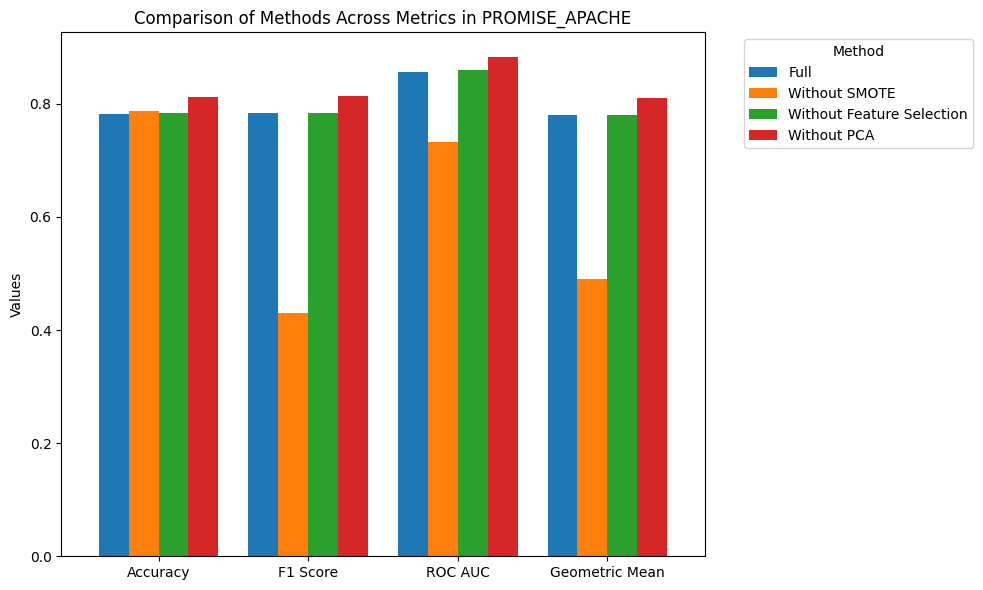

In [289]:
import matplotlib.pyplot as plt

# Data
categories = ['Accuracy', 'F1 Score', 'ROC AUC', 'Geometric Mean']
methods = ['Full', 'Without SMOTE', 'Without Feature Selection', 'Without PCA']

values = {
    'Full': [0.782442594, 0.782908909, 0.855987014, 0.780567595],
    'Without SMOTE': [0.787880386, 0.430764997, 0.732047731, 0.490038826],
    'Without Feature Selection': [0.783129935, 0.78397083, 0.858892463, 0.78041967],
    'Without PCA': [0.811215767, 0.813901499, 0.88211935, 0.809354696]
}

# Convert to a DataFrame for easier plotting
df = pd.DataFrame(values, index=categories)

# Plot
df.plot(kind='bar', figsize=(10, 6), width=0.8)
plt.title('Comparison of Methods Across Metrics in PROMISE_APACHE')
plt.ylabel('Values')
plt.xticks(rotation=0)
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()
